In [4]:
import matplotlib.gridspec as gridspec

import sys
original_sys_path = sys.path.copy()
from CoupledQuantumSystems.visualization import *

In [7]:

from scqubits.settings import matplotlib_settings
import matplotlib as mpl
from matplotlib.axes import Axes
from scqubits.utils.plot_utils import _extract_kwargs_options
from numpy import ndarray
from scqubits.utils.misc import InfoBar, process_which
import scqubits.core.constants as constants
from scqubits.utils.spectrum_utils import (
    get_matrixelement_table,
    order_eigensystem,
    recast_esys_mapdata,
    standardize_sign,
)
from scqubits.utils.plot_utils import (
    _extract_kwargs_options,
    _process_options,
    add_numbers_to_axes,
    color_normalize,
    plot_potential_to_axes,
    plot_wavefunction_to_axes,
    scale_wavefunctions,
)
import scqubits.utils.misc as utils

@mpl.rc_context(matplotlib_settings)
def plot_wavefunction(
    qbt,
    which = 0,
    colors = None,
    mode= "real",
    esys = None,
    phi_grid = None,
    scaling = None,
    **kwargs,
):

    wavefunc_indices = process_which(which, qbt.truncated_dim)

    if esys is None:
        evals_count = max(wavefunc_indices) + 1
        esys = qbt.eigensys(evals_count=evals_count)
        evals, _ = esys
    else:
        evals, _ = esys

    if colors == None:
        colors = ['grey' for _ in range(len(evals))]

    energies = evals[list(wavefunc_indices)]

    phi_grid = phi_grid or qbt._default_grid
    potential_vals = qbt.potential(phi_grid.make_linspace())

    amplitude_modifier = constants.MODE_FUNC_DICT[mode]
    wavefunctions = []
    for wavefunc_index in wavefunc_indices:
        phi_wavefunc = qbt.wavefunction(
            esys, which=wavefunc_index, phi_grid=phi_grid
        )
        phi_wavefunc.amplitudes = standardize_sign(phi_wavefunc.amplitudes)
        phi_wavefunc.amplitudes = amplitude_modifier(phi_wavefunc.amplitudes)
        wavefunctions.append(phi_wavefunc)

    fig_ax = kwargs.get("fig_ax") or plt.subplots()
    kwargs["fig_ax"] = fig_ax
    kwargs = {
        **qbt.wavefunction1d_defaults(
            mode, evals, wavefunc_count=len(wavefunc_indices)  # type:ignore
        ),
        **kwargs,
    }
    # in merging the dictionaries in the previous line: if any duplicates,
    # later ones survive

    wavefunction1d(
        wavefunctions,
        potential_vals=potential_vals,  # type:ignore
        offset=energies,
        scaling=scaling,
        colors = colors,
        **kwargs,
    )
    return fig_ax

@mpl.rc_context(matplotlib_settings)
def wavefunction1d(
    wavefuncs,
    potential_vals,
    offset,
    scaling,
    colors,
    **kwargs,
):

    fig, axes = kwargs.get("fig_ax") or plt.subplots()

    offset_list = utils.to_list(offset)
    wavefunc_list = utils.to_list(wavefuncs)
    wavefunc_list = scale_wavefunctions(wavefunc_list, potential_vals, scaling)

    for wavefunction, energy_offset,color in zip(wavefunc_list, offset_list,colors):
        plot_wavefunction_to_axes(axes, wavefunction, energy_offset,color=color, **kwargs)

    x_vals = wavefunc_list[0].basis_labels
    plot_potential_to_axes(axes, x_vals, potential_vals, offset_list, **kwargs)

    _process_options(fig, axes, **kwargs)
    return fig, axes



@mpl.rc_context(matplotlib_settings)
def plot_wavefunction_to_axes(
    axes,
      wavefunction,
      energy_offset,
      color,
        **kwargs
) -> None:
    x_vals = wavefunction.basis_labels
    y_vals = energy_offset + wavefunction.amplitudes
    offset_vals = [energy_offset] * len(x_vals)

    axes.plot(x_vals, y_vals,color = color, alpha=0.5, **_extract_kwargs_options(kwargs, "plot"))
    axes.fill_between(
        x_vals, y_vals, offset_vals,color = color, alpha=0.5,where=(y_vals != offset_vals), interpolate=True
    )


@mpl.rc_context(matplotlib_settings)
def plot_potential_to_axes(
    axes,
    x_vals,
    potential_vals,
    offset_list,
    **kwargs,
) -> None:
    y_min = np.min(potential_vals)
    y_max = np.max(offset_list)
    y_range = y_max - y_min

    y_max += 0.3 * y_range
    y_min = np.min(potential_vals) - 0.1 * y_range
    axes.set_ylim([y_min, y_max])

    axes.plot(
        x_vals, potential_vals, color="gray", **_extract_kwargs_options(kwargs, "plot")
    )


In [8]:
n_evals = 20
qbt = scqubits.Fluxonium(EJ = 3,EC = 3/4,EL = 3/20.5, cutoff = 110,flux = 0,truncated_dim=n_evals)

omega_0 = qbt.eigenvals()[0]
omega_1 = qbt.eigenvals()[1]
omega_2 = qbt.eigenvals()[2]

omega_7 = qbt.eigenvals(10)[7]

omega_10 = qbt.eigenvals(13)[10]

 /var/folders/9k/z8bpg3hj3d9841ggs75xmwxw0000gn/T/ipykernel_2858/3694506214.py: 98

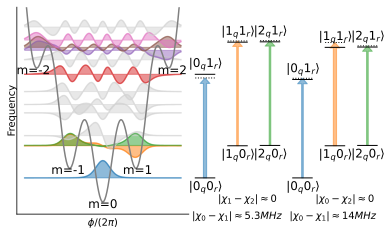

In [21]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
fig = plt.figure(figsize=(5,6),constrained_layout=False)

# gs1 = fig.add_gridspec(nrows=1, ncols=3, wspace=0.0,width_ratios = [3, 1.7, 1.7],left=0.15, right=1.021276595744681+0.15,bottom=0.5,top = 0.98)
# gs2 = fig.add_gridspec(nrows=1, ncols=1, wspace=0.0,left=0.15, right=0.6,bottom=0.0,top = 0.5)
# gs2 = fig.add_gridspec(nrows=1, ncols=1, wspace=0.0,left=0.15, right=0.6,bottom=0.0,top = 0.5)


gs1 = fig.add_gridspec(nrows=1, ncols=3, wspace=0.0,width_ratios = [3, 1.7, 1.7],left=-0.3, right=1.021276595744681+0.15-0.15-0.3,bottom=0.5,top = 0.98)
# gs2 = fig.add_gridspec(nrows=1, ncols=1, wspace=0.0,left=0.15, right=0.6,bottom=0.0,top = 0.5)
# gs2 = fig.add_gridspec(nrows=1, ncols=1, wspace=0.0,left=0.15, right=0.6,bottom=0.0,top = 0.5)

def plot_wave_function(fig,ax):
    fig, ax = plot_wavefunction( qbt, which=list(range(13)),colors = [*colors,
                                                                    'lightgrey','lightgrey','lightgrey','lightgrey', '#d62728','lightgrey',
                                                                    '#9467bd', '#8c564b', '#e377c2','lightgrey'
                                                                    ],
                                                                    fig_ax =(fig, ax ) )


    ax.set_xticks(np.array([-2,-1,0,1,2])*2* np.pi)
    current_ticks = ax.get_xticks()
    modified_ticks = current_ticks /(2* np.pi)
    ax.set_xticklabels([f'{val:.1f}' for val in modified_ticks])
    ax.set_xlabel(r"$\phi/(2\pi)$")

    ax.set_yticks(np.array([0,5,10,15])+omega_0)
    current_ticks = ax.get_yticks()
    modified_ticks = current_ticks - omega_0
    ax.set_yticklabels([f'{val:.0f}' for val in modified_ticks])
    # ax.set_ylabel(rf'''Frequency / $2\pi$ (GHZ)''',labelpad = 0)
    ax.set_ylabel(rf'''Frequency''',labelpad = 0)
    ax.set_ylim(-4,13)

    ax.text(0,-3.5,"m=0",ha='center', fontsize=12)
    ax.text(-1*2* np.pi,     -0.7,"m=-1",ha='center', fontsize=12)
    ax.text(1*2* np.pi,     -0.7,"m=1",ha='center', fontsize=12)
    ax.text(-2*2* np.pi,    7.5,"m=-2",ha='center', fontsize=12)
    ax.text(2*2* np.pi,     7.5,"m=2",ha='center', fontsize=12)

    # ax.plot([2.1*2* np.pi, 2.1*2* np.pi], [omega_0,omega_7],color = 'black',linewidth = 2)
    # ax.plot([2.2*2* np.pi, 2.2*2* np.pi], [omega_1,omega_1 - omega_0 + omega_7],color = 'grey',linewidth = 1.5,linestyle='--')
ax0 = fig.add_subplot(gs1[0])
plot_wave_function(fig,ax0 )
ax0.set_xticks([])
ax0.set_yticks([])

def plot_transition_ef(ax):
    ax.axis('off')
    ax.set_ylim(ax0.get_ylim())
    ax.set_xlim((-0.5,2.5))
    ax.margins(2)
    for ql, x,freq in zip([0,1,2],
                    [0,1,2],
                    [omega_0,omega_1,omega_2]):
        ax.plot([x-0.3, x+0.3], [freq, freq], linewidth=1, color='black',linestyle = '-')
        ax.plot([x-0.3, x+0.3], [freq+omega_7-omega_0, freq+omega_7-omega_0], linewidth=1, color='black',linestyle = '-')
        ax.text(x-0.5,freq-1,rf"$|{ql}_q 0_r\rangle$", fontsize=12)
        ax.text(x-0.5,freq+omega_7-omega_0+0.6,rf"$|{ql}_q 1_r\rangle$", fontsize=12)
        if ql != 0:
            arrow = ax.arrow(x,freq, 0, omega_7-omega_0+0.1,width = 0.05,head_width=0.3,length_includes_head = True,alpha = 0.5)
            arrow.set(edgecolor = None,color=colors[ql])
            ax.plot([x-0.3, x+0.3], [freq+omega_7-omega_0 + 0.1, freq+omega_7-omega_0 +0.1], linewidth=1, color='black',linestyle = 'dotted')
    ax.plot([-0.3, +0.3], [omega_0+omega_7-omega_0 - 0.3, omega_0+omega_7-omega_0 - 0.3], linewidth=1, color='black',linestyle = 'dotted')
    arrow =  ax.arrow(0,omega_0, 0, omega_7-omega_0-0.3,width = 0.1,head_width=0.3,length_includes_head = True,alpha = 0.5)
    arrow.set(edgecolor = None,color=colors[0])

    ax.text(0.4,-5+2,rf"$|\chi_1 - \chi_2|\approx 0$", fontsize=10)
    ax.text(-0.4,-6.4+2,rf"$|\chi_0 - \chi_1| \approx 5.3MHz$", fontsize=10)
    
plot_transition_ef(fig.add_subplot(gs1[1]))

def plot_transition_gf(ax):
    ax.axis('off')
    ax.set_ylim(ax0.get_ylim())
    ax.set_xlim((-0.5,2.5))
    ax.margins(2)
    for ql, x,freq in zip([0,1,2],
                    [0,1,2],
                    [omega_0,omega_1,omega_2]):
        ax.plot([x-0.3, x+0.3], [freq, freq], linewidth=1, color='black',linestyle = '-')
        ax.plot([x-0.3, x+0.3], [freq+omega_10-omega_1, freq+omega_10-omega_1], linewidth=1, color='black',linestyle = '-')
        ax.text(x-0.5,freq-1,rf"$|{ql}_q 0_r\rangle$", fontsize=12)
        ax.text(x-0.5,freq+omega_10-omega_1+0.6,rf"$|{ql}_q 1_r\rangle$", fontsize=12)
        if ql != 1:
            arrow = ax.arrow(x,freq, 0, omega_10-omega_1+0.1,width = 0.05,head_width=0.3,length_includes_head = True,alpha = 0.5)
            arrow.set(edgecolor = None,color=colors[ql])
            ax.plot([x-0.3, x+0.3], [freq+omega_10-omega_1 + 0.1, freq+omega_10-omega_1 +0.1], linewidth=1, color='black',linestyle = 'dotted')
    ax.plot([1-0.3, 1+0.3], [omega_1+omega_10-omega_1 + 0.4, omega_1+omega_10-omega_1 +0.4], linewidth=1, color='black',linestyle = 'dotted')
    arrow =  ax.arrow(1,omega_1, 0, omega_10-omega_1+0.4,width = 0.1,head_width=0.3,length_includes_head = True,alpha = 0.5)
    arrow.set(edgecolor = None,color=colors[1])

    ax.text(0.4,-5+2,rf"$|\chi_0 - \chi_2|\approx 0$", fontsize=10)
    ax.text(-0.4,-6.4+2,rf"$|\chi_0 - \chi_1| \approx 14 MHz$", fontsize=10)
    
plot_transition_gf(fig.add_subplot(gs1[2]))

plt.tight_layout()
fig.savefig('wavefuncs.pdf')


 /var/folders/9k/z8bpg3hj3d9841ggs75xmwxw0000gn/T/ipykernel_38242/156389972.py: 95

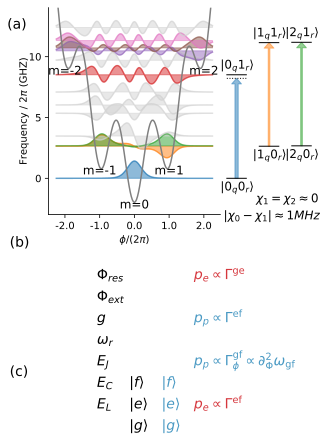

In [5]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
fig = plt.figure(figsize=(5,6),constrained_layout=False)

gs1 = fig.add_gridspec(nrows=1, ncols=2, wspace=0.0,width_ratios = [3, 1.7],left=0.15, right=0.9,bottom=0.5,top = 0.98)
gs2 = fig.add_gridspec(nrows=1, ncols=1, wspace=0.0,left=0.15, right=0.6,bottom=0.0,top = 0.5)
gs2 = fig.add_gridspec(nrows=1, ncols=1, wspace=0.0,left=0.15, right=0.6,bottom=0.0,top = 0.5)


def plot_wave_function(fig,ax):
    fig, ax = plot_wavefunction( qbt, which=list(range(13)),colors = [*colors,
                                                                    'lightgrey','lightgrey','lightgrey','lightgrey', '#d62728','lightgrey',
                                                                    '#9467bd', '#8c564b', '#e377c2','lightgrey'
                                                                    ],
                                                                    fig_ax =(fig, ax ) )


    ax.set_xticks(np.array([-2,-1,0,1,2])*2* np.pi)
    current_ticks = ax.get_xticks()
    modified_ticks = current_ticks /(2* np.pi)
    ax.set_xticklabels([f'{val:.1f}' for val in modified_ticks])
    ax.set_xlabel(r"$\phi/(2\pi)$")

    ax.set_yticks(np.array([0,5,10,15])+omega_0)
    current_ticks = ax.get_yticks()
    modified_ticks = current_ticks - omega_0
    ax.set_yticklabels([f'{val:.0f}' for val in modified_ticks])
    ax.set_ylabel(rf'''Frequency / $2\pi$ (GHZ)''',labelpad = 0)
    ax.set_ylim(-4,13)

    ax.text(0,-3.5,"m=0",ha='center', fontsize=12)
    ax.text(-1*2* np.pi,     -0.7,"m=-1",ha='center', fontsize=12)
    ax.text(1*2* np.pi,     -0.7,"m=1",ha='center', fontsize=12)
    ax.text(-2*2* np.pi,    7.5,"m=-2",ha='center', fontsize=12)
    ax.text(2*2* np.pi,     7.5,"m=2",ha='center', fontsize=12)

    # ax.plot([2.1*2* np.pi, 2.1*2* np.pi], [omega_0,omega_7],color = 'black',linewidth = 2)
    # ax.plot([2.2*2* np.pi, 2.2*2* np.pi], [omega_1,omega_1 - omega_0 + omega_7],color = 'grey',linewidth = 1.5,linestyle='--')
ax0 = fig.add_subplot(gs1[0])
plot_wave_function(fig,ax0 )

def plot_transition(ax):
    ax.axis('off')
    ax.set_ylim(ax0.get_ylim())
    ax.set_xlim((-0.5,2.5))
    ax.margins(2)
    for ql, x,freq in zip([0,1,2],
                    [0,1,2],
                    [omega_0,omega_1,omega_2]):
        ax.plot([x-0.3, x+0.3], [freq, freq], linewidth=1, color='black',linestyle = '-')
        ax.plot([x-0.3, x+0.3], [freq+omega_7-omega_0, freq+omega_7-omega_0], linewidth=1, color='black',linestyle = '-')
        ax.text(x-0.5,freq-1,rf"$|{ql}_q 0_r\rangle$", fontsize=12)
        ax.text(x-0.5,freq+omega_7-omega_0+0.5,rf"$|{ql}_q 1_r\rangle$", fontsize=12)
        if ql != 0:
            arrow = ax.arrow(x,freq, 0, omega_7-omega_0,width = 0.05,head_width=0.3,length_includes_head = True,alpha = 0.5)
            arrow.set(edgecolor = None,color=colors[ql])
    ax.plot([-0.3, +0.3], [omega_0+omega_7-omega_0 - 0.3, omega_0+omega_7-omega_0 - 0.3], linewidth=1, color='black',linestyle = 'dotted')
    arrow =  ax.arrow(0,omega_0, 0, omega_7-omega_0-0.3,width = 0.1,head_width=0.3,length_includes_head = True,alpha = 0.5)
    arrow.set(edgecolor = None,color=colors[0])

    ax.text(0.6,-5+2,rf"$\chi_1 = \chi_2\approx 0$", fontsize=12)
    ax.text(-0.4,-6.4+2,rf"$|\chi_0 - \chi_1| \approx 1MHz$", fontsize=12)
    
plot_transition(fig.add_subplot(gs1[1]))

ax3 = fig.add_subplot(gs2[0])
ax3.axis('off')
ax3.text(0.3,0.1,rf"$E_L$", fontsize=14)
ax3.text(0.3,0.2,rf"$E_C$", fontsize=14)
ax3.text(0.3,0.3,rf"$E_J$", fontsize=14)
ax3.text(0.3,0.4,rf"$\omega_r$", fontsize=14)
ax3.text(0.3,0.5,rf"$g$", fontsize=14)
ax3.text(0.3,0.6,rf"$\Phi_{{ext}}$", fontsize=14)
ax3.text(0.3,0.7,rf"$\Phi_{{res}}$", fontsize=14)


plt.text(-0.24, 0.95, '(a)', transform=plt.subplot(gs1[0]).transAxes, fontsize=14, va='top', color='black')
plt.text(-0.24, 0.9, '(b)', transform=plt.subplot(gs2[0]).transAxes, fontsize=14, va='top', color='black')
plt.text(-0.24, 0.3, '(c)', transform=plt.subplot(gs2[0]).transAxes, fontsize=14, va='top', color='black')

ax3.text(0.5,0.0,rf"$|g\rangle$", fontsize=14)
ax3.text(0.5,0.1,rf"$|e\rangle$", fontsize=14)
ax3.text(0.5,0.2,rf"$|f\rangle$", fontsize=14)


ax3.text(0.7,0.0,rf"$|g\rangle$", fontsize=14,color='#4999c3')
ax3.text(0.7,0.1,rf"$|e\rangle$", fontsize=14,color='#4999c3')
ax3.text(0.7,0.2,rf"$|f\rangle$", fontsize=14,color='#4999c3')

ax3.text(0.9,0.3,rf"$p_p\propto \Gamma_\phi^\text{{gf}} \propto \partial_\Phi^2 \omega_\text{{gf}}$", fontsize=14,color='#4999c3')
ax3.text(0.9,0.1,rf"$p_e\propto  \Gamma^\text{{ef}}$", fontsize=14,color= '#d5373d')


ax3.text(0.9,0.7,rf"$p_e\propto \Gamma^\text{{ge}}$", fontsize=14,color='#d5373d')
ax3.text(0.9,0.5,rf"$p_p\propto  \Gamma^\text{{ef}}$", fontsize=14,color= '#4999c3')


plt.tight_layout()
fig.savefig('wavefuncs.pdf')
